<a href="https://colab.research.google.com/github/muksmuks/computer_vision/blob/master/project_6/Assignment_6A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


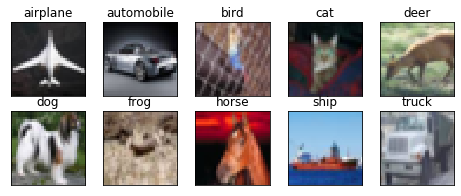

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':





Epoch 1/50





390/390 [==============================] - 21s 53ms/step - loss: 1.8660 - acc: 0.2828 - val_loss: 1.5182 - val_acc: 0.4305
Epoch 2/50
390/390 [==============================] - 7s 17ms/step - loss: 1.3804 - acc: 0.4996 - val_loss: 1.1411 - val_acc: 0.5912
Epoch 3/50
390/390 [==============================] - 7s 17ms/step - loss: 1.1453 - acc: 0.5941 - val_loss: 0.9811 - val_acc: 0.6565
Epoch 4/50
390/390 [==============================] - 6s 17ms/step - loss: 1.0006 - acc: 0.6502 - val_loss: 0.8771 - val_acc: 0.6932
Epoch 5/50
390/390 [==============================] - 7s 17ms/step - loss: 0.8959 - acc: 0.6895 - val_loss: 0.8203 - val_acc: 0.7117
Epoch 6/50
390/390 [==============================] - 7s 17ms/step - loss: 0.8260 - acc: 0.7151 - val_loss: 0.7533 - val_acc: 0.7358
Epoch 7/50
390/390 [==============================] - 7s 17ms/step - loss: 0.7674 - acc: 0.7391 - val_loss: 0.7305 - val_acc: 0.7497
Epoch 8/50
390/390 [==============================] - 6s 17m

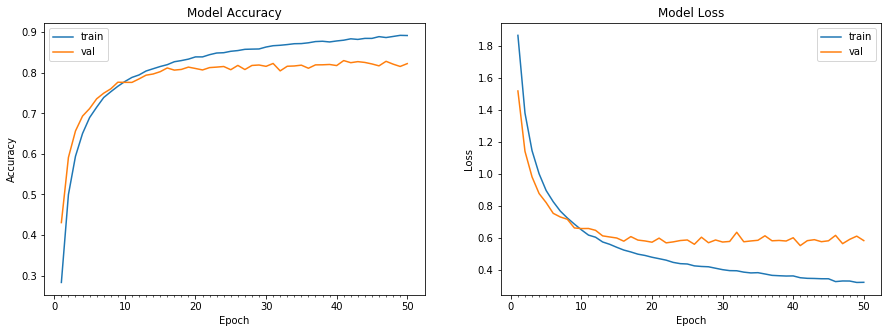

Accuracy on test data is: 82.26


In [0]:
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

####Base Accuracy = 82.26% in 50 epochs
####Model took 344.53 seconds to train

###Assignment Goals

1. Fix the network above:
        1. remove dense
        2. add layers required to reach RF
        3. fix kernel scaleup and down (1x1)
        4. see if all dropouts are properly placed
        5. follow the guidelines we discussed in the class
        6. Get accuracy more than the base accuracy in less number 100 epochs. Hint, you might want to use "border_mode='same',"

####Let take a parse to find out what's not right in the base network

1. 3 Fully connected layers
2. Large number of parameters, Fully connected layer contributing to it
3. The filter size is not getting increased in a proper way after convolutions
4. According to recommendations, dropout probability value should be : "In the simplest case, each unit is retained with a fixed probability p independent of other units, where p can be chosen using a validation set or can simply be set at 0.5, which seems to be close to optimal for a wide range of networks and tasks. For the input units, however, the optimal probability of retention is usually closer to 1 than to 0.5."
5. Dropout should not be there before output layer



```

# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3))) ##RF : 3x3
model.add(Activation('relu'))

model.add(Convolution2D(48, 3, 3)) ##RF : 5x5
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) ##RF : 10x10
model.add(Dropout(0.25))

model.add(Convolution2D(96, 3, 3, border_mode='same')) ##RF : 12x12
model.add(Activation('relu'))

model.add(Convolution2D(96, 3, 3)) ##RF : 14x14
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))  ##RF : 28x28
model.add(Dropout(0.25))

model.add(Convolution2D(192, 3, 3, border_mode='same'))##RF : 30x30
model.add(Activation('relu'))

model.add(Convolution2D(192, 3, 3))##RF : 32x32
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))##RF : 64x64
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))


model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

```


####Attempt 1
1. Changed the filters size
2. Removed the extra dense layers 
3. Removed dropout before the final output
4. Model took 389.81 seconds to train

####The parameters have reduced
####Total params: 437,898

####Crossed 82.26 in the 23th epoch

In [31]:
# Define the model
model = Sequential()
model.add(Convolution2D(64, 3, 3, border_mode='same', input_shape=(32, 32, 3))) ##RF : 3x3
model.add(Activation('relu'))

model.add(Convolution2D(128, 3, 3)) ##RF : 5x5
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) ##RF : 10x10
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3, border_mode='same')) ##RF : 12x12
model.add(Activation('relu'))

model.add(Convolution2D(128, 3, 3)) ##RF : 14x14
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))  ##RF : 28x28
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3, border_mode='same'))##RF : 30x30
model.add(Activation('relu'))

model.add(Convolution2D(128, 3, 3))##RF : 32x32
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))##RF : 64x64
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(num_classes, activation='softmax'))


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3))`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3))`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 

In [32]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_36 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 30, 30, 128)       73856     
_________________________________________________________________
activation_37 (Activation)   (None, 30, 30, 128)       0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 15, 15, 128)       0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 15, 15, 64)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  """


Epoch 1/50
390/390 [==============================] - 9s 22ms/step - loss: 1.7034 - acc: 0.3639 - val_loss: 1.4563 - val_acc: 0.4846
Epoch 2/50
390/390 [==============================] - 8s 20ms/step - loss: 1.1785 - acc: 0.5749 - val_loss: 1.0132 - val_acc: 0.6385
Epoch 3/50
390/390 [==============================] - 8s 20ms/step - loss: 0.9625 - acc: 0.6561 - val_loss: 0.8744 - val_acc: 0.6884
Epoch 4/50
390/390 [==============================] - 8s 20ms/step - loss: 0.8235 - acc: 0.7091 - val_loss: 0.7790 - val_acc: 0.7321
Epoch 5/50
390/390 [==============================] - 8s 20ms/step - loss: 0.7383 - acc: 0.7399 - val_loss: 0.7309 - val_acc: 0.7469
Epoch 6/50
390/390 [==============================] - 8s 20ms/step - loss: 0.6713 - acc: 0.7668 - val_loss: 0.6529 - val_acc: 0.7788
Epoch 7/50
390/390 [==============================] - 8s 20ms/step - loss: 0.6165 - acc: 0.7818 - val_loss: 0.6263 - val_acc: 0.7803
Epoch 8/50
390/390 [==============================] - 8s 20ms/step - 

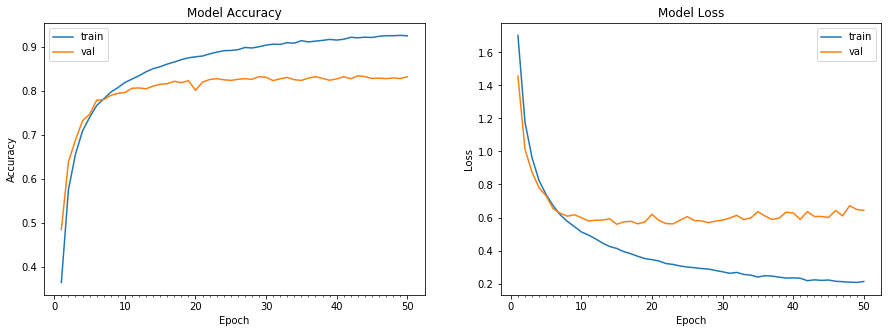

Accuracy on test data is: 83.21


In [33]:
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

####Attempt 2
1. Deleted the final two FC layers with a convolution layer
2. Model took 403 seconds to train
3. The parameters have reduced,Total params: 376,074

####Crossed Base accuracy of 82.26 in the 36th epoch

In [19]:
# Define the model
model = Sequential()
model.add(Convolution2D(64, 3, 3, border_mode='same', input_shape=(32, 32, 3))) ##RF : 3x3
model.add(Activation('relu'))

model.add(Convolution2D(128, 3, 3)) ##RF : 5x5
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) ##RF : 10x10
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3, border_mode='same')) ##RF : 12x12
model.add(Activation('relu'))

model.add(Convolution2D(128, 3, 3)) ##RF : 14x14
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))  ##RF : 28x28
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3, border_mode='same'))##RF : 30x30
model.add(Activation('relu'))

model.add(Convolution2D(128, 3, 3))##RF : 32x32
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))##RF : 64x64
model.add(Dropout(0.25))

#model.add(Flatten())


#model.add(Dense(128))
model.add(Convolution2D(num_classes, 2, 2))
model.add(Activation('softmax'))
model.add(Flatten())

#model.add(Dense(num_classes, activation='softmax'))


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3))`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3))`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 

In [20]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_33 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 30, 30, 128)       73856     
_________________________________________________________________
activation_34 (Activation)   (None, 30, 30, 128)       0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 128)       0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 15, 15, 64)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  """


Epoch 1/50





390/390 [==============================] - 23s 58ms/step - loss: 1.7221 - acc: 0.3604 - val_loss: 1.3108 - val_acc: 0.5283
Epoch 2/50
390/390 [==============================] - 8s 20ms/step - loss: 1.2097 - acc: 0.5667 - val_loss: 1.0356 - val_acc: 0.6387
Epoch 3/50
390/390 [==============================] - 8s 20ms/step - loss: 1.0075 - acc: 0.6428 - val_loss: 0.9672 - val_acc: 0.6602
Epoch 4/50
390/390 [==============================] - 8s 20ms/step - loss: 0.8793 - acc: 0.6913 - val_loss: 0.8756 - val_acc: 0.6901
Epoch 5/50
390/390 [==============================] - 8s 20ms/step - loss: 0.7900 - acc: 0.7218 - val_loss: 0.7491 - val_acc: 0.7399
Epoch 6/50
390/390 [==============================] - 8s 20ms/step - loss: 0.7110 - acc: 0.7501 - val_loss: 0.7056 - val_acc: 0.7631
Epoch 7/50
390/390 [==============================] - 8s 20ms/step - loss: 0.6560 - acc: 0.7716 - val_loss: 0.6756 - val_acc: 0.7709
Epoch 8/50
390/390 [==============================] - 8s 20ms/s

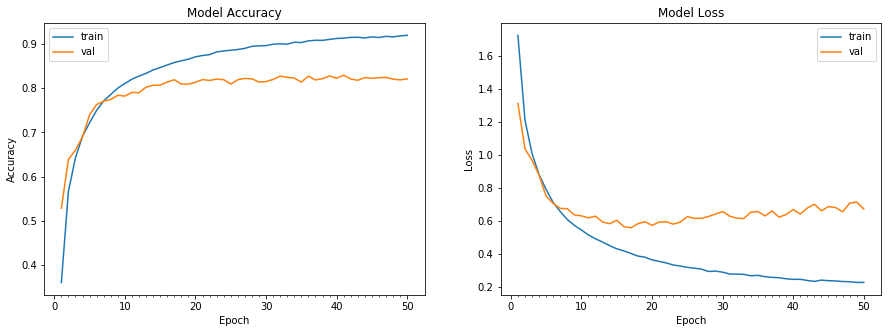

Accuracy on test data is: 82.12


In [21]:
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))